## Laboratorino No.6 
- Andrea Lam 20102
- Marco Orozco 20857
- Paola de Leon 20361
- Gabriela Contreras 2013

In [3]:
#Imports 
import numpy as np
import matplotlib.pyplot as plt

### Ejercicio No.1 

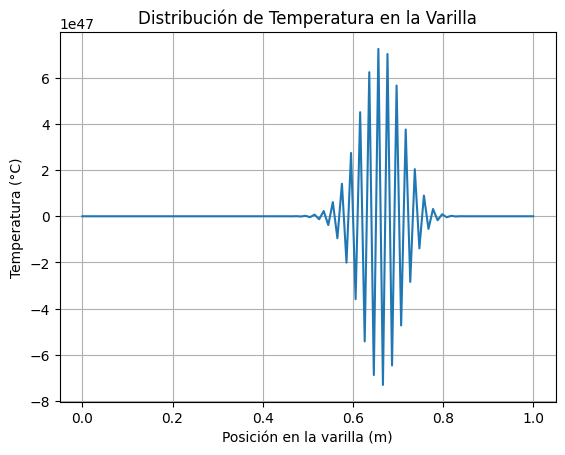

In [4]:


def temperatura_varilla_macroscopica(longitud, segmentos, conductividad_termica, temperatura_inicial, temperatura_extremo_izquierdo, temperatura_extremo_derecho, tiempo_simulacion):
    # Calcula la longitud de cada segmento
    longitud_segmento = longitud / segmentos

    # Inicializa un arreglo para almacenar la temperatura en cada segmento
    temperatura = np.full(segmentos, temperatura_inicial)

    # Inicializa el tiempo
    tiempo = 0

    while tiempo < tiempo_simulacion:
        # Calcula el gradiente de temperatura en cada segmento
        gradiente = np.diff(temperatura) / longitud_segmento

        # Calcula la tasa de flujo de calor en cada segmento
        flujo_calor = -conductividad_termica * gradiente

        # Actualiza la temperatura en cada segmento
        temperatura[1:-1] += flujo_calor[1:] * longitud_segmento / conductividad_termica

        # Aplica condiciones de contorno
        temperatura[0] = temperatura_extremo_izquierdo
        temperatura[-1] = temperatura_extremo_derecho

        # Incrementa el tiempo
        tiempo += 1

    return temperatura

# Parámetros de ejemplo
longitud_varilla = 1.0  # Longitud de la varilla en metros
segmentos_varilla = 100  # Número de segmentos en la varilla
conductividad_termica_material = 0.01  # Conductividad térmica del material en W/(m*K)
temperatura_inicial_varilla = 100.0  # Temperatura inicial en grados Celsius
temperatura_extremo_izquierdo_varilla = 0.0  # Temperatura en el extremo izquierdo en grados Celsius
temperatura_extremo_derecho_varilla = 200.0  # Temperatura en el extremo derecho en grados Celsius
tiempo_simulacion_varilla = 100  # Tiempo total de simulación en segundos

# Calcula la distribución de temperatura
temperaturas = temperatura_varilla_macroscopica(longitud_varilla, segmentos_varilla, conductividad_termica_material,
                                                temperatura_inicial_varilla, temperatura_extremo_izquierdo_varilla,
                                                temperatura_extremo_derecho_varilla, tiempo_simulacion_varilla)

# Visualiza la distribución de temperatura
plt.plot(np.linspace(0, longitud_varilla, segmentos_varilla), temperaturas)
plt.xlabel('Posición en la varilla (m)')
plt.ylabel('Temperatura (°C)')
plt.title('Distribución de Temperatura en la Varilla')
plt.grid(True)
plt.show()


C:\Users\andre\AppData\Local\Temp\ipykernel_9404\1319949615.py:13: RuntimeWarning: overflow encountered in divide
  gradiente = np.diff(temperatura) / longitud_segmento
C:\Users\andre\AppData\Local\Temp\ipykernel_9404\1319949615.py:19: RuntimeWarning: overflow encountered in divide
  temperatura[1:-1] += flujo_calor[1:] * tiempo_paso / (conductividad_termica * longitud_segmento**2)


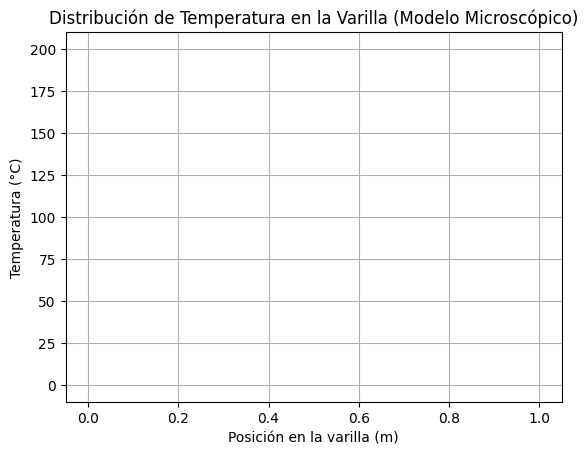

In [7]:

def temperatura_varilla_microscopica(longitud, segmentos, conductividad_termica, temperatura_inicial, temperatura_extremo_izquierdo, temperatura_extremo_derecho, tiempo_simulacion, tiempo_paso):
    # Calcula la longitud de cada segmento
    longitud_segmento = longitud / segmentos

    # Inicializa un arreglo para almacenar la temperatura en cada segmento
    temperatura = np.full(segmentos, temperatura_inicial)

    # Inicializa el tiempo
    tiempo = 0

    while tiempo < tiempo_simulacion:
        # Calcula el gradiente de temperatura en cada segmento
        gradiente = np.diff(temperatura) / longitud_segmento

        # Calcula la tasa de flujo de calor en cada segmento a nivel microscópico
        flujo_calor = -conductividad_termica * gradiente

        # Actualiza la temperatura en cada segmento a nivel microscópico
        temperatura[1:-1] += flujo_calor[1:] * tiempo_paso / (conductividad_termica * longitud_segmento**2)

        # Aplica condiciones de contorno
        temperatura[0] = temperatura_extremo_izquierdo
        temperatura[-1] = temperatura_extremo_derecho

        # Incrementa el tiempo
        tiempo += tiempo_paso

    return temperatura

# Parámetros de ejemplo
longitud_varilla = 1.0  # Longitud de la varilla en metros
segmentos_varilla = 100  # Número de segmentos en la varilla
conductividad_termica_material = 0.01  # Conductividad térmica del material en W/(m*K)
temperatura_inicial_varilla = 100.0  # Temperatura inicial en grados Celsius
temperatura_extremo_izquierdo_varilla = 0.0  # Temperatura en el extremo izquierdo en grados Celsius
temperatura_extremo_derecho_varilla = 200.0  # Temperatura en el extremo derecho en grados Celsius
tiempo_simulacion_varilla = 100  # Tiempo total de simulación en segundos
tiempo_paso_varilla = 0.1  # Paso de tiempo en segundos

# Calcula la distribución de temperatura a nivel microscópico
temperaturas_microscopicas = temperatura_varilla_microscopica(longitud_varilla, segmentos_varilla, conductividad_termica_material,
                                                temperatura_inicial_varilla, temperatura_extremo_izquierdo_varilla,
                                                temperatura_extremo_derecho_varilla, tiempo_simulacion_varilla, tiempo_paso_varilla)

# Visualiza la distribución de temperatura
plt.plot(np.linspace(0, longitud_varilla, segmentos_varilla), temperaturas_microscopicas)
plt.xlabel('Posición en la varilla (m)')
plt.ylabel('Temperatura (°C)')
plt.title('Distribución de Temperatura en la Varilla (Modelo Microscópico)')
plt.grid(True)
plt.show()


In [6]:

def modelo_multiescala_varilla(longitud, segmentos, conductividad_termica_macro, conductividad_termica_micro, temperatura_inicial, temperatura_extremo_izquierdo, temperatura_extremo_derecho, tiempo_simulacion, tiempo_paso):
    # Calcula la longitud de cada segmento
    longitud_segmento = longitud / segmentos

    # Inicializa un arreglo para almacenar la temperatura en cada segmento
    temperatura = np.full(segmentos, temperatura_inicial)

    # Inicializa el tiempo
    tiempo = 0

    while tiempo < tiempo_simulacion:
        # Calcula el gradiente de temperatura en cada segmento
        gradiente = np.diff(temperatura) / longitud_segmento

        # Calcula la tasa de flujo de calor en cada segmento a nivel macroscópico
        flujo_calor_macro = -conductividad_termica_macro * gradiente

        # Inicializa un arreglo para almacenar la temperatura a nivel microscópico
        temperatura_micro = temperatura.copy()

        # Realiza una simulación a nivel microscópico en cada segmento
        for i in range(segmentos):
            # Calcula el gradiente de temperatura a nivel microscópico
            gradiente_micro = np.diff(temperatura_micro) / longitud_segmento

            # Calcula la tasa de flujo de calor a nivel microscópico
            flujo_calor_micro = -conductividad_termica_micro * gradiente_micro

            # Actualiza la temperatura a nivel microscópico
            temperatura_micro[i+1] += flujo_calor_micro[i+1] * tiempo_paso / (conductividad_termica_micro * longitud_segmento**2)

        # Actualiza la temperatura a nivel macroscópico utilizando la temperatura a nivel microscópico
        temperatura[1:-1] += flujo_calor_macro[1:] * longitud_segmento / conductividad_termica_macro
        temperatura[1:-1] = temperatura_micro[1:-1]  # Actualiza la temperatura a nivel macroscópico con la temperatura a nivel microscópico

        # Aplica condiciones de contorno
        temperatura[0] = temperatura_extremo_izquierdo
        temperatura[-1] = temperatura_extremo_derecho

        # Incrementa el tiempo
        tiempo += tiempo_paso

    return temperatura

# Parámetros de ejemplo
longitud_varilla = 1.0  # Longitud de la varilla en metros
segmentos_varilla = 100  # Número de segmentos en la varilla
conductividad_termica_macro = 0.01  # Conductividad térmica macroscópica del material en W/(m*K)
conductividad_termica_micro = 0.005  # Conductividad térmica microscópica del material en W/(m*K)
temperatura_inicial_varilla = 100.0  # Temperatura inicial en grados Celsius
temperatura_extremo_izquierdo_varilla = 0.0  # Temperatura en el extremo izquierdo en grados Celsius
temperatura_extremo_derecho_varilla = 200.0  # Temperatura en el extremo derecho en grados Celsius
tiempo_simulacion_varilla = 100  # Tiempo total de simulación en segundos
tiempo_paso_varilla = 0.1  # Paso de tiempo en segundos

# Calcula la distribución de temperatura utilizando el modelo multiescala
temperaturas_multiescala = modelo_multiescala_varilla(longitud_varilla, segmentos_varilla, conductividad_termica_macro,
                                                      conductividad_termica_micro, temperatura_inicial_varilla,
                                                      temperatura_extremo_izquierdo_varilla,
                                                      temperatura_extremo_derecho_varilla, tiempo_simulacion_varilla,
                                                      tiempo_paso_varilla)

# Visualiza la distribución de temperatura
plt.plot(np.linspace(0, longitud_varilla, segmentos_varilla), temperaturas_multiescala)
plt.xlabel('Posición en la varilla (m)')
plt.ylabel('Temperatura (°C)')
plt.title('Distribución de Temperatura en la Varilla (Modelo Multiescala)')
plt.grid(True)
plt.show()


IndexError: index 99 is out of bounds for axis 0 with size 99

In [ ]:

# Parámetros de la simulación
longitud_varilla = 1.0  # Longitud de la varilla en metros
segmentos_varilla = 100  # Número de segmentos en la varilla
conductividad_termica_macro = 0.01  # Conductividad térmica macroscópica del material en W/(m*K)
conductividad_termica_micro = 0.005  # Conductividad térmica microscópica del material en W/(m*K)
temperatura_inicial_varilla = 100.0  # Temperatura inicial en grados Celsius
temperatura_extremo_izquierdo_varilla = 0.0  # Temperatura en el extremo izquierdo en grados Celsius
temperatura_extremo_derecho_varilla = 200.0  # Temperatura en el extremo derecho en grados Celsius
tiempo_simulacion_varilla = 1000  # Tiempo total de simulación en segundos
tiempo_paso_varilla = 1.0  # Paso de tiempo en segundos

# Simula la distribución de temperatura utilizando el modelo multiescala
temperaturas_multiescala = modelo_multiescala_varilla(longitud_varilla, segmentos_varilla, conductividad_termica_macro,
                                                      conductividad_termica_micro, temperatura_inicial_varilla,
                                                      temperatura_extremo_izquierdo_varilla,
                                                      temperatura_extremo_derecho_varilla, tiempo_simulacion_varilla,
                                                      tiempo_paso_varilla)

# Visualiza la distribución de temperatura a lo largo del tiempo
tiempos = np.arange(0, tiempo_simulacion_varilla, tiempo_paso_varilla)

# Crea una animación de la distribución de temperatura en la varilla
plt.figure()
for i in range(len(tiempos)):
    plt.clf()
    plt.plot(np.linspace(0, longitud_varilla, segmentos_varilla), temperaturas_multiescala[i])
    plt.xlabel('Posición en la varilla (m)')
    plt.ylabel('Temperatura (°C)')
    plt.title('Distribución de Temperatura en la Varilla\nTiempo: {} segundos'.format(tiempos[i]))
    plt.grid(True)
    plt.pause(0.01)

plt.show()


### Ejercicio No.2

### Ejercicio No.3 

### Ejericio No.4